<a href="https://colab.research.google.com/github/bbcndoro/bigData/blob/main/TimeSeriesLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install yfinance pandas numpy matplotlib scikit-learn tensorflow


/tmp/ipython-input-1748064697.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", start="2016-01-01", end="2025-12-01")
[*********************100%***********************]  1 of 1 completed

Jumlah data: 3622
Data training : 2857
Data testing  : 715



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - loss: 0.0039
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.1567e-04
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 1.9480e-04
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.9403e-04
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.9011e-04
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1.6427e-04
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 1.3115e-04
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.1814e-04
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.2524e-04
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.3938e-04
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 1.0839e-04
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1.1714e-04
Epoch 13/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 1.0087e-04
Epoch 14/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1.0742e-04
Epoch 15/20
90/90 

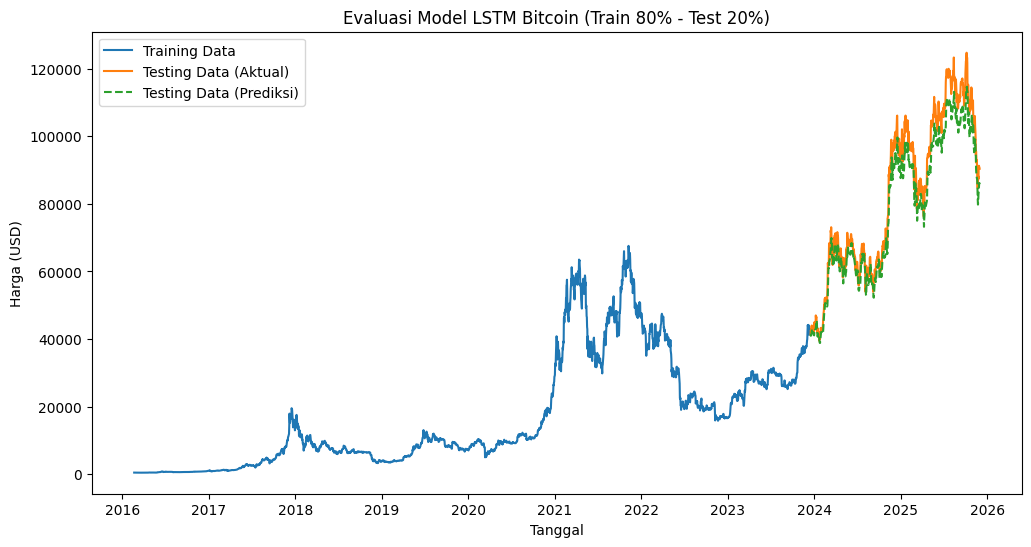

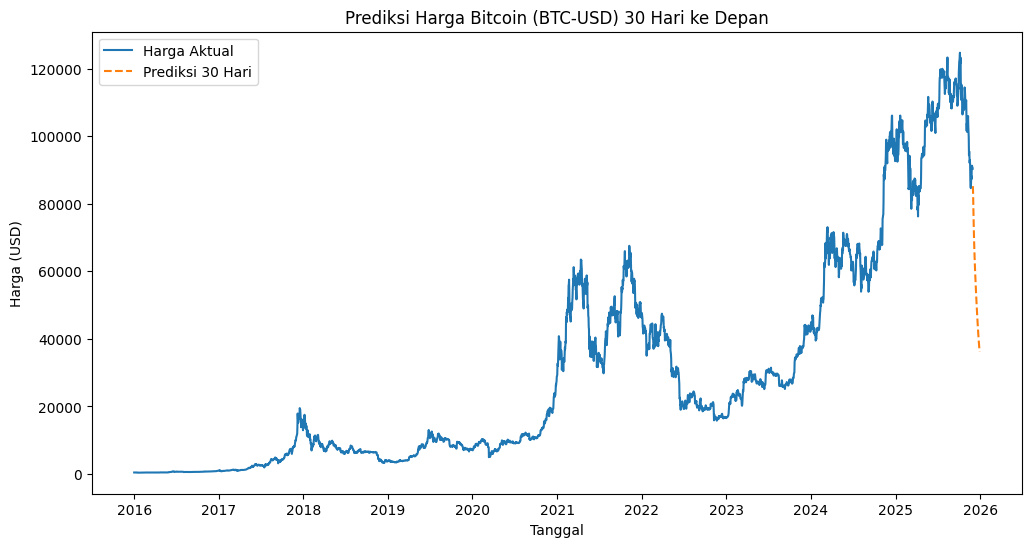


Prediksi Harga Bitcoin 30 Hari ke Depan:
      Tanggal  Prediksi_Harga_BTC_USD
0  2025-12-01            85238.757812
1  2025-12-02            82272.523438
2  2025-12-03            78728.156250
3  2025-12-04            75269.820312
4  2025-12-05            72135.773438
5  2025-12-06            69366.656250
6  2025-12-07            66923.031250
7  2025-12-08            64742.570312
8  2025-12-09            62764.328125
9  2025-12-10            60937.429688
10 2025-12-11            59222.597656
11 2025-12-12            57591.164062
12 2025-12-13            56023.371094
13 2025-12-14            54506.394531
14 2025-12-15            53032.753906
15 2025-12-16            51598.871094
16 2025-12-17            50203.769531
17 2025-12-18            48848.191406
18 2025-12-19            47533.832031
19 2025-12-20            46262.710938
20 2025-12-21            45036.910156
21 2025-12-22            43858.101562
22 2025-12-23            42727.566406
23 2025-12-24            41645.964844
24 2025-

In [9]:
# =========================================================
# ANALISIS TIME SERIES BITCOIN (BTC-USD)
# LSTM + TRAIN 80% | TEST 20% | PREDIKSI 30 HARI
# =========================================================

# -----------------------------
# 1. IMPORT LIBRARY
# -----------------------------
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# -----------------------------
# 2. AMBIL DATA BITCOIN
# -----------------------------
df = yf.download("BTC-USD", start="2016-01-01", end="2025-12-01")
df = df[['Close']]
df.dropna(inplace=True)

print("Jumlah data:", len(df))


# -----------------------------
# 3. NORMALISASI DATA
# -----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df.values)


# -----------------------------
# 4. MEMBUAT DATASET TIME SERIES
# -----------------------------
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

TIME_STEPS = 50

X, y = create_dataset(data_scaled, TIME_STEPS)
X = X.reshape(X.shape[0], X.shape[1], 1)


# -----------------------------
# 5. PEMBAGIAN DATA (80% TRAIN, 20% TEST)
# -----------------------------
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

print("Data training :", len(X_train))
print("Data testing  :", len(X_test))


# -----------------------------
# 6. MEMBANGUN MODEL LSTM
# -----------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(TIME_STEPS, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()


# -----------------------------
# 7. MELATIH MODEL (TRAINING)
# -----------------------------
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    verbose=1
)


# -----------------------------
# 8. PREDIKSI DATA TESTING
# -----------------------------
y_pred_test = model.predict(X_test)

# Kembalikan ke skala asli
y_pred_test = scaler.inverse_transform(y_pred_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


# -----------------------------
# 9. EVALUASI MODEL
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))
mae = mean_absolute_error(y_test_actual, y_pred_test)

print("RMSE:", rmse)
print("MAE :", mae)


# -----------------------------
# 10. VISUALISASI TRAIN vs TEST
# -----------------------------
plt.figure(figsize=(12, 6))

# Data training
plt.plot(
    df.index[TIME_STEPS:train_size + TIME_STEPS],
    scaler.inverse_transform(y_train.reshape(-1, 1)),
    label='Training Data'
)

# Data testing (aktual)
plt.plot(
    df.index[train_size + TIME_STEPS:],
    y_test_actual,
    label='Testing Data (Aktual)'
)

# Data testing (prediksi)
plt.plot(
    df.index[train_size + TIME_STEPS:],
    y_pred_test,
    '--',
    label='Testing Data (Prediksi)'
)

plt.title("Evaluasi Model LSTM Bitcoin (Train 80% - Test 20%)")
plt.xlabel("Tanggal")
plt.ylabel("Harga (USD)")
plt.legend()
plt.show()


# -----------------------------
# 11. PREDIKSI 30 HARI KE DEPAN
# -----------------------------
future_days = 30

last_sequence = data_scaled[-TIME_STEPS:]
last_sequence = last_sequence.reshape(1, TIME_STEPS, 1)

future_predictions = []

for i in range(future_days):
    next_pred = model.predict(last_sequence, verbose=0)
    future_predictions.append(next_pred[0, 0])

    last_sequence = np.append(
        last_sequence[:, 1:, :],
        [[[next_pred[0, 0]]]],
        axis=1
    )

future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)


# -----------------------------
# 12. MEMBUAT TANGGAL PREDIKSI
# -----------------------------
future_dates = pd.date_range(
    start=df.index[-1] + pd.Timedelta(days=1),
    periods=future_days
)


# -----------------------------
# 13. VISUALISASI PREDIKSI 30 HARI
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Harga Aktual')
plt.plot(future_dates, future_predictions, '--', label='Prediksi 30 Hari')

plt.title("Prediksi Harga Bitcoin (BTC-USD) 30 Hari ke Depan")
plt.xlabel("Tanggal")
plt.ylabel("Harga (USD)")
plt.legend()
plt.show()


# -----------------------------
# 14. TABEL HASIL PREDIKSI
# -----------------------------
forecast_df = pd.DataFrame({
    "Tanggal": future_dates,
    "Prediksi_Harga_BTC_USD": future_predictions.flatten()
})

print("\nPrediksi Harga Bitcoin 30 Hari ke Depan:")
print(forecast_df)
